In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets

In [5]:
X.shape, y.shape

((8124, 22), (8124, 1))

In [9]:
X.select_dtypes(include=["object"]).shape

(8124, 22)

In [10]:
## Note: All are categoric

In [11]:
y.value_counts()

poisonous
e            4208
p            3916
Name: count, dtype: int64

In [12]:
X[:10]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
5,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g
6,b,s,w,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,n,m
7,b,y,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,s,m
8,x,y,w,t,p,f,c,n,p,e,...,s,w,w,p,w,o,p,k,v,g
9,b,s,y,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,s,m


ValueError: 2

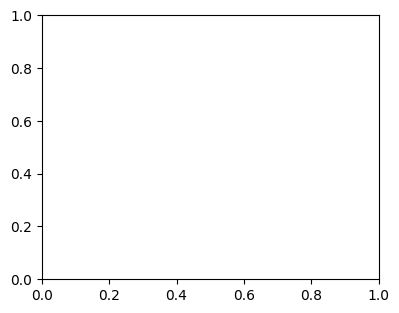

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to create stacked bar plots
def plot_stacked_bar_charts(df, target_col, cols, n_cols=4):
    n_rows = len(cols) // n_cols + int(len(cols) % n_cols != 0)
    plt.figure(figsize=(n_cols * 5, n_rows * 4))
    
    for i, col in enumerate(cols, 1):
        plt.subplot(n_rows, n_cols, i)
        cross_tab = pd.crosstab(df[col], df[target_col], normalize='index')
        cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
        plt.title(f'Target Distribution in {col}')
        plt.ylabel('Proportion')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

# Load the Mushroom dataset (as it was done earlier)
# mushroom_df = pd.read_csv('/path/to/mushroom-dataset.csv')

# Generate stacked bar plots for the categorical columns against the target
plot_stacked_bar_charts(X, y, X.columns[1:])